# Prediction
## Libraries and Datasets


In [135]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myPreprocessing.R")
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myPrediction.R")

In [136]:
load(url("https://github.com/eogasawara/mylibrary/raw/master/data/iris.RData"))
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


## Building samples (training and testing)

In [137]:
iris_tt = sample.random(iris)
iris_train = iris_tt[[1]]
iris_test = iris_tt[[2]]

tbl <- rbind(table(iris$Species), table(iris_train$Species), table(iris_test$Species))
rownames(tbl) <- c("dataset", "training", "test")
head(tbl)

,setosa,versicolor,virginica
dataset,50,50,50
training,42,37,41
test,8,13,9


## Majority class baseline prediction (Zero Rule)

Model creating and level of adjustment during training

In [138]:
model <- ZeroRule_model <- class_ZeroRule(iris_train, "Species")
head(model$train$metrics)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5666667,0.35,0.35,0.675,0.35,0.35


Prediction using Zero Rule

In [139]:
test <- ZeroRule_test <- class_test(model, iris_test, "Species")
head(test$predictions)

1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0


Quality of prediction using Zero Rule

In [140]:
head(test$metrics)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5111111,0.2666667,0.2666667,0.6333333,0.2666667,0.2666667


Confusion matrix

In [141]:
head(test$conf_mat)

       predictions
targets  1
      1  8
      2 13
      3  9

## Decision Tree
Training the model, presenting the level of adjustment, quality of prediction, and confusion matrix.

In [142]:
model <- tree_model <- class_tree(iris_train, "Species")
head(model$train$metrics)
test <- class_test(model, iris_test, "Species")
head(test$metrics)
head(test$conf_mat)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9888889,0.9833333,0.9833333,0.9916667,0.9833333,0.9833333


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9111111,0.8666667,0.8666667,0.9333333,0.8666667,0.8666667


       predictions
targets  1  2  3
      1  8  0  0
      2  0 11  2
      3  0  2  7

Understing the produced model. 
Take a time comparing with the exploratory analysis.

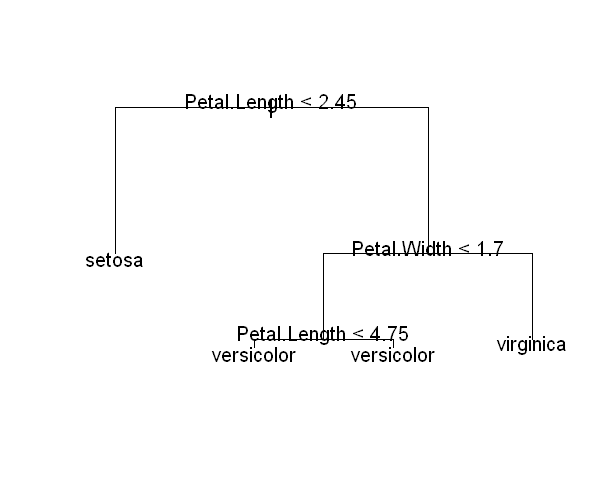

In [143]:
plot_size(5, 4)
plot(tree_model$model)
text(tree_model$model)

## Naive Bayes

In [144]:
model <- nb_model <- class_naiveBayes(iris_train, "Species")
head(model$train$metrics)
test <- class_test(model, iris_test, "Species")
head(test$metrics)
head(test$conf_mat)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9888889,0.9833333,0.9833333,0.9916667,0.9833333,0.9833333


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8888889,0.8333333,0.8333333,0.9166667,0.8333333,0.8333333


       predictions
targets  1  2  3
      1  8  0  0
      2  0 10  3
      3  0  2  7

In [145]:
print(nb_model$model)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    setosa versicolor  virginica 
 0.3500000  0.3083333  0.3416667 

Conditional probabilities:
            Sepal.Length
Y                [,1]      [,2]
  setosa     5.007143 0.3557149
  versicolor 5.945946 0.5118564
  virginica  6.602439 0.5511297

            Sepal.Width
Y                [,1]      [,2]
  setosa     3.454762 0.3603537
  versicolor 2.735135 0.3284782
  virginica  2.990244 0.3104874

            Petal.Length
Y                [,1]      [,2]
  setosa     1.461905 0.1820646
  versicolor 4.232432 0.4761268
  virginica  5.524390 0.5146749

            Petal.Width
Y                 [,1]      [,2]
  setosa     0.2452381 0.1130560
  versicolor 1.3000000 0.1885618
  virginica  2.0292683 0.2431501



## Random Forest

In [146]:
model <- rf_model <- class_randomForest(iris_train, "Species")
head(model$train$metrics)
test <- class_test(model, iris_test, "Species")
head(test$metrics)
head(test$conf_mat)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,1


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9111111,0.8666667,0.8666667,0.9333333,0.8666667,0.8666667


       predictions
targets  1  2  3
      1  8  0  0
      2  0 11  2
      3  0  2  7

## Prepare dataset for Machine Learning

In [147]:
iris_train_n <- normalize.minmax(iris_train)
iris_train_n$data$Class <- iris_train$Class
iris_test_n  <- normalize.minmax(iris_test, iris_train_n$norm.set)
iris_test_n$data$Class <- iris_test$Class

## Neural Networks - MLP using nnet


In [148]:
model <- mlp_nnet_model <-  class_mlp_nnet(iris_train_n$data, "Species")
head(model$train$metrics)
test <- mlp_nnet_test <- class_test(model, iris_test_n$data, "Species")
head(test$metrics)
head(test$conf_mat)

# weights:  27
initial  value 101.348687 
iter  10 value 28.894876
iter  20 value 11.790441
iter  30 value 10.362204
iter  40 value 9.923474
iter  50 value 9.768647
iter  60 value 9.680004
iter  70 value 9.622098
iter  80 value 9.619029
iter  90 value 9.618843
iter 100 value 9.618835
final  value 9.618835 
converged


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9888889,0.9833333,0.9833333,0.9916667,0.9833333,0.9833333


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9555556,0.9333333,0.9333333,0.9666667,0.9333333,0.9333333


       predictions
targets  1  2  3
      1  8  0  0
      2  0 11  2
      3  0  0  9

## Neural Networks - MLP using RSNNS

In [149]:
model <- mlp_rsnns_model <- class_mlp_RSNNS(iris_train_n$data, "Species")
head(model$train$metrics)
test <- class_test(model, iris_test_n$data, "Species")
head(test$metrics)
head(test$conf_mat)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9944444,0.9916667,0.9916667,0.9958333,0.9916667,0.9916667


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9555556,0.9333333,0.9333333,0.9666667,0.9333333,0.9333333


       predictions
targets  1  2  3
      1  8  0  0
      2  0 11  2
      3  0  0  9

## Neural Networks - RBF using RSNNS

In [150]:
model <- rbf_rsnns_model <- class_rbf_RSNNS(iris_train_n$data, "Species")
head(model$train$metrics)
test <- class_test(model, iris_test_n$data, "Species")
head(test$metrics)
head(test$conf_mat)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9833333,0.975,0.975,0.9875,0.975,0.975


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9111111,0.8666667,0.8666667,0.9333333,0.8666667,0.8666667


       predictions
targets  1  2  3
      1  8  0  0
      2  1 10  2
      3  0  1  8

## Creating a SVM with RBF kernel

In [151]:
model <- svm_rbf_model <- class_svm_rbf(iris_train_n$data, "Species")
head(model$train$metrics)
test <- class_test(model, iris_test_n$data, "Species")
head(test$metrics)
head(test$conf_mat)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9833333,0.975,0.975,0.9875,0.975,0.975


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9555556,0.9333333,0.9333333,0.9666667,0.9333333,0.9333333


       predictions
targets  1  2  3
      1  8  0  0
      2  0 11  2
      3  0  0  9

## Creating a SVM with polynomial kernel


In [152]:
model <- svm_poly_model <- class_svm_poly(iris_train_n$data, "Species")
head(model$train$metrics)
test <- class_test(model, iris_test_n$data, "Species")
head(test$metrics)
head(test$conf_mat)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9888889,0.9833333,0.9833333,0.9916667,0.9833333,0.9833333


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9555556,0.9333333,0.9333333,0.9666667,0.9333333,0.9333333


       predictions
targets  1  2  3
      1  8  0  0
      2  0 12  1
      3  0  1  8

## Creating a SVM with sigmoid kernel

In [153]:
model <- svm_sigmoid_model <-class_svm_sigmoid(iris_train_n$data, "Species")
head(model$train$metrics)
test <- class_test(model, iris_test_n$data, "Species")
head(test$metrics)
head(test$conf_mat)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.85,0.775,0.775,0.8875,0.775,0.775


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8,0.7,0.7,0.85,0.7,0.7


       predictions
targets 1 2 3
      1 7 1 0
      2 1 8 4
      3 0 3 6

## knn prediction

In [154]:
model <- knn_model <-class_knn(iris_train_n$data, "Species", k=3)
head(model$train$metrics)
test <- class_test(model, iris_test_n$data, "Species")
head(test$metrics)
head(test$conf_mat)

accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9833333,0.975,0.975,0.9875,0.975,0.975


accuracy,f1,sensitivity,specificity,precision,recall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9111111,0.8666667,0.8666667,0.9333333,0.8666667,0.8666667


       predictions
targets  1  2  3
      1  8  0  0
      2  0 11  2
      3  0  2  7

# Measuring the quality of predictions

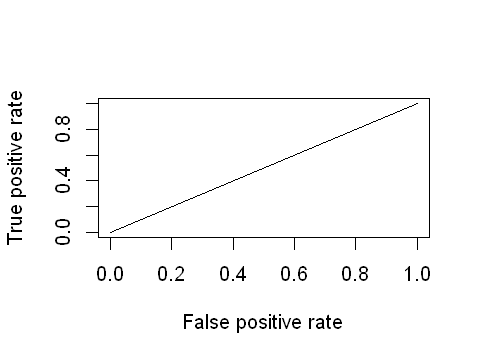

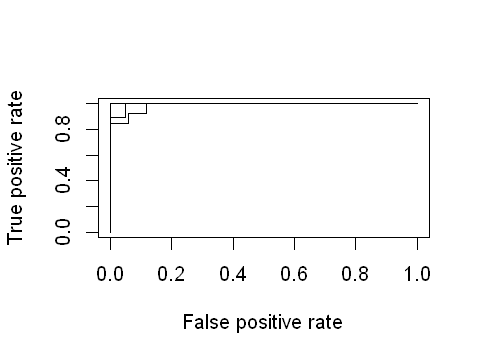

In [156]:
plot_size(4, 3)
zr_rocr <- compute_rocr(ZeroRule_test$predictions, ZeroRule_test$values)
plot(zr_rocr)

mlp_nnet_rocr <- compute_rocr(mlp_nnet_test$predictions, ZeroRule_test$values)
plot(mlp_nnet_rocr)